## Імпортуємо бібліотеки і дані

In [1]:
#імпорт бібліотек
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve

In [2]:
#завантаження даних
test_data = pd.read_csv('data/test.csv')
train_data = pd.read_csv('data/train.csv')

In [3]:
train_data.sample(10)

Id  Week        V1   V2        V3        V4        V5  \
28072 -6978816117861761876     0  0.000000  0.0  0.049398  0.150824  0.000000   
15156  -281184661307481652     0  0.025641  1.0  0.000000  0.011905  0.000000   
28960 -4734338331024052897     0  0.000000  0.0  0.091270  0.134272  0.000000   
21432 -1179981265787550729     0  0.107143  3.0  0.023965  0.000000  0.014706   
23026  5159177812405464069     2  0.208333  4.0  0.021222  0.040333  0.000000   
16889  8663456801986743589     1  0.000000  0.0  0.012976  0.028179  0.003378   
10003 -4552764210474858471     3  0.000000  0.0  0.000000  0.000000  0.000000   
11387  7539030462256965458     3  0.033333  1.0       NaN       NaN       NaN   
26166  8574894346817103897     2  0.000000  0.0       NaN       NaN       NaN   
7836   8209279824978768200     0  0.041667  1.0       NaN       NaN       NaN   

             V6        V7        V8  ...        P19   P20        P21    P22  \
28072  0.000000  0.151263  0.099120  ...  24.966667  4.91  10.877778  340.0   
15156  0.000000  0.224758  0.140343  ...  18.950000  4.95   7.596212  292.0   
28960  0.000000  0.105426  0.094017  ...  15.700000  4.99  10.360417  194.0   
21432  0.000000  0.022059  0.078377  ...  27.066667  5.00   7.265686  397.0   
23026  0.000000  0.112539  0.216620  ...  15.833333  5.00   7.908333  200.0   
16889  0.003378  0.201167  0.216050  ...  17.900000  4.99   6.804630  216.0   
10003  0.000000  0.000000  0.000000  ...  26.750000  4.96   6.969048  170.0   
11387       NaN       NaN       NaN  ...  18.416667  4.98   9.101212  206.0   
26166       NaN       NaN       NaN  ...        NaN   NaN        NaN    NaN   
7836        NaN       NaN       NaN  ...        NaN   NaN        NaN    NaN   

            P23       P24       P25     P26       P27  target  
28072  0.000000  4.910000  0.000000  5990.0  0.666667     0.0  
15156  0.000000  4.949545  0.409091  1277.0  0.136364     0.0  
28960  0.000000  4.990000  0.000000  9073.0  0.375000     1.0  
21432  0.058824  5.000000  0.705882  2037.0  0.235294     0.0  
23026  0.000000  5.000000  0.625000  1985.0  0.666667     0.0  
16889  0.000000  4.982857  0.566667     4.0  0.131868     0.0  
10003  0.000000  4.948312  0.818182  1134.0  0.012987     0.0  
11387  0.000000  4.978364  0.218182  1168.0  0.345455     0.0  
26166       NaN       NaN       NaN     NaN       NaN     1.0  
7836        NaN       NaN       NaN     NaN       NaN     0.0  

[10 rows x 52 columns]

In [4]:
test_data.sample(10)

Id  Week        V1   V2        V3        V4        V5  \
2045  -4604234606637118573     1  0.000000  0.0  0.000000  0.034896  0.000000   
10512 -5313527808543809528     0  0.102564  4.0       NaN       NaN       NaN   
8549  -1488895602300072019     1  0.025641  1.0  0.007353  0.000000  0.067339   
4859   3253742661075601549     3  0.000000  0.0  0.022727  0.058442  0.022727   
2317   8461250578468450107     1  0.051282  1.0       NaN       NaN       NaN   
4881   6659492932101736528     1  0.000000  0.0  0.097942  0.043938  0.002427   
2361   1706511569358128687     1  0.000000  0.0       NaN       NaN       NaN   
8934   3088582735769847266     2  0.025641  1.0       NaN       NaN       NaN   
11144 -1880135032156738027     0  0.000000  0.0  0.033380  0.037914  0.000000   
2282   4251775347948456732     2  0.000000  0.0  0.042656  0.050419  0.000000   

        V6        V7        V8  ...           P18        P19   P20        P21  \
2045   0.0  0.313185  0.314391  ...  12429.631579  15.383333  4.96   6.614815   
10512  NaN       NaN       NaN  ...  17307.277778  21.800000  4.93   8.709259   
8549   0.0  0.034196  0.037453  ...  13468.088235  14.983333  5.00   7.580882   
4859   0.0  0.040584  0.442641  ...  21941.416667  18.633333  4.94   8.213889   
2317   NaN       NaN       NaN  ...           NaN        NaN   NaN        NaN   
4881   0.0  0.184376  0.157356  ...   9432.388350  27.416667  4.97   8.656311   
2361   NaN       NaN       NaN  ...           NaN        NaN   NaN        NaN   
8934   NaN       NaN       NaN  ...           NaN        NaN   NaN        NaN   
11144  0.0  0.096310  0.004098  ...  14846.615385  14.683333  4.87   7.643827   
2282   0.0  0.064127  0.075430  ...  10499.297030  42.800000  4.94  10.603833   

         P22       P23       P24       P25     P26       P27  
2045   531.0  0.000000  4.960000  0.833333  3481.0  0.578947  
10512  309.0  0.000000  4.930000  0.944444  7286.0  0.555556  
8549   385.0  0.088235  5.000000  0.852941  2215.0  0.323529  
4859   766.0  0.000000  4.940000  0.833333  3670.0  1.000000  
2317     NaN       NaN       NaN       NaN     NaN       NaN  
4881   500.0  0.009709  4.961942  0.000000  1692.0  0.223301  
2361     NaN       NaN       NaN       NaN     NaN       NaN  
8934     NaN       NaN       NaN       NaN     NaN       NaN  
11144  288.0  0.000000  4.856154  0.703704  2829.0  0.423077  
2282   300.0  0.000000  4.930891  0.000000  1274.0  0.287129  

[10 rows x 51 columns]

## Перевірка даних на сумісність 

In [5]:
# Перевіримо що файли мають однакові колонки
train_columns = train_data.columns.tolist()
train_columns.remove("target")
test_columns = test_data.columns.tolist()
print("Колонки однакові: ", sorted(train_columns) == sorted(test_columns))

Колонки однакові:  True


In [6]:
# Перевіримо типи
print("Train types")
display(train_data.dtypes)
print("\n\nTest types")
display(test_data.dtypes)
print("\n\nTrain_types == Test_types :", (train_data[train_columns].dtypes == test_data.dtypes).all())

Train types


Id          int64
Week        int64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
P1        float64
P2        float64
P3        float64
P4        float64
P5        float64
P6        float64
P7        float64
P8        float64
P9        float64
P10       float64
P11       float64
P12       float64
P13       float64
P14       float64
P15       float64
P16       float64
P17       float64
P18       float64
P19       float64
P20       float64
P21       float64
P22       float64
P23       float64
P24       float64
P25       float64
P26       float64
P27       float64
target    float64
dtype: object



Test types


Id        int64
Week      int64
V1      float64
V2      float64
V3      float64
V4      float64
V5      float64
V6      float64
V7      float64
V8      float64
V9      float64
V10     float64
V11     float64
V12     float64
V13     float64
V14     float64
V15     float64
V16     float64
V17     float64
V18     float64
V19     float64
V20     float64
V21     float64
V22     float64
P1      float64
P2      float64
P3      float64
P4      float64
P5      float64
P6      float64
P7      float64
P8      float64
P9      float64
P10     float64
P11     float64
P12     float64
P13     float64
P14     float64
P15     float64
P16     float64
P17     float64
P18     float64
P19     float64
P20     float64
P21     float64
P22     float64
P23     float64
P24     float64
P25     float64
P26     float64
P27     float64
dtype: object



Train_types == Test_types : True


## Вивчення даних

In [7]:
train_data.describe()

Id          Week            V1            V2            V3  \
count  3.086000e+04  30860.000000  30812.000000  30812.000000  23760.000000   
mean   5.880459e+16      1.500000      0.086103      1.917175      0.046198   
std    5.305951e+18      1.118052      0.116918      2.962384      0.074886   
min   -9.217316e+18      0.000000      0.000000      0.000000      0.000000   
25%   -4.443360e+18      0.750000      0.000000      0.000000      0.000000   
50%    6.482893e+16      1.500000      0.047619      1.000000      0.020706   
75%    4.655320e+18      2.250000      0.128205      2.000000      0.054194   
max    9.222566e+18      3.000000      0.823529     28.000000      0.806543   

                 V4            V5            V6            V7            V8  \
count  23760.000000  23760.000000  23760.000000  23760.000000  23760.000000   
mean       0.046558      0.010059      0.008308      0.152373      0.111035   
std        0.080221      0.030413      0.049233      0.136181      0.104658   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.002933      0.000000      0.000000      0.050836      0.039541   
50%        0.023266      0.000000      0.000000      0.125738      0.089358   
75%        0.053769      0.007143      0.000000      0.215331      0.150164   
max        0.938948      0.804446      0.862319      0.993363      1.000000   

       ...           P19           P20           P21           P22  \
count  ...  27947.000000  27946.000000  27947.000000  27946.000000   
mean   ...     26.592387      4.944650      9.013416    323.196450   
std    ...     25.158699      0.060288      2.901414    146.382184   
min    ...      0.166667      4.240000      0.141667     48.000000   
25%    ...     15.666667      4.920000      7.479428    223.000000   
50%    ...     20.466667      4.960000      8.477667    290.000000   
75%    ...     30.233333      4.990000      9.835913    390.000000   
max    ...    486.150000      5.000000     71.516667   2049.000000   

                P23           P24           P25            P26           P27  \
count  27947.000000  27946.000000  27947.000000   27946.000000  27946.000000   
mean       0.008797      4.940130      0.492355    3266.263186      0.344434   
std        0.040291      0.063075      0.329794    3144.738593      0.257145   
min        0.000000      4.217500      0.000000       0.000000      0.000000   
25%        0.000000      4.920000      0.184211    1423.000000      0.140187   
50%        0.000000      4.960000      0.530435    2293.000000      0.294118   
75%        0.000000      4.980000      0.780488    3973.750000      0.500000   
max        1.000000      5.000000      1.000000  120092.000000      1.000000   

             target  
count  30860.000000  
mean       0.173169  
std        0.378400  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000  

[8 rows x 52 columns]

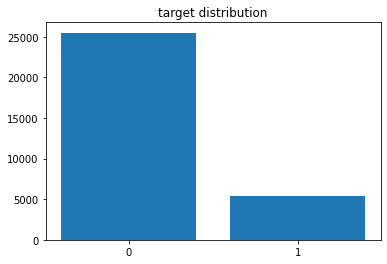

In [8]:
d = train_data.groupby(['target'])['Id'].count()
plt.bar(x=d.index, height=d.values, tick_label =[0,1])
plt.title('target distribution')
plt.show()

In [9]:
# Подивимось на відсутні значення у відсотках.
train_data.isna().sum().sort_values() / train_data.shape[0] * 100

Id         0.000000
target     0.000000
Week       0.000000
V1         0.155541
V2         0.155541
P14        9.232016
P25        9.439404
P23        9.439404
P21        9.439404
P19        9.439404
P17        9.439404
P9         9.439404
P8         9.439404
P4         9.439404
P3         9.439404
P10        9.442644
P26        9.442644
P24        9.442644
P22        9.442644
P20        9.442644
P18        9.442644
P16        9.442644
P15        9.442644
P13        9.442644
P12        9.442644
P11        9.442644
P7         9.442644
P6         9.442644
P2         9.442644
P27        9.442644
P1         9.442644
P5         9.442644
V11       23.007129
V15       23.007129
V3        23.007129
V16       23.007129
V4        23.007129
V17       23.007129
V5        23.007129
V18       23.007129
V6        23.007129
V7        23.007129
V20       23.007129
V21       23.007129
V8        23.007129
V22       23.007129
V13       23.007129
V9        23.007129
V10       23.007129
V12       23.007129


Бачимо, що тільки три колонки не мають відсутніх значень: Id, target, Week

Також помічаємо, що усі колонки V_ після V2 мають на диво однаковий процент відсутніх значень, аналогічно з P_. Перевіримо здогадки. 

In [10]:
columns_v_ = [f"V{i}" for i in range(3,23)]

train_data.loc[train_data["V3"].isna(),columns_v_ ].isna().sum() / train_data[columns_v_].isna().sum()

V3     1.0
V4     1.0
V5     1.0
V6     1.0
V7     1.0
V8     1.0
V9     1.0
V10    1.0
V11    1.0
V12    1.0
V13    1.0
V14    1.0
V15    1.0
V16    1.0
V17    1.0
V18    1.0
V19    1.0
V20    1.0
V21    1.0
V22    1.0
dtype: float64

Як бачимо, і справді в колонках V2 - V22 - пропущені значення одночасні

In [11]:
columns_p_ = [f"P{i}" for i in range(1,28)]

train_data.loc[train_data["P1"].isna(),columns_p_ ].isna().sum()/ train_data[columns_p_].isna().sum()

P1     1.00000
P2     1.00000
P3     0.99897
P4     0.99897
P5     1.00000
P6     1.00000
P7     1.00000
P8     0.99897
P9     0.99897
P10    1.00000
P11    1.00000
P12    1.00000
P13    1.00000
P14    1.00000
P15    1.00000
P16    1.00000
P17    0.99897
P18    1.00000
P19    0.99897
P20    1.00000
P21    0.99897
P22    1.00000
P23    0.99897
P24    1.00000
P25    0.99897
P26    1.00000
P27    1.00000
dtype: float64

Як бачимо, порожні значення не прям ідеальноо співставні в P_ але в пропорціональному відношенні це можна вважати за похибку. Тому нехай будемо вважати, що в P_ відсутні знаечння досягаються одночасно.

In [12]:
# подивимось на кількість унікальних значень
# Подивимось на відношення кількості унікальних до в принципі кількості об'єктів, відношення до не відсутніх об'єктів, і знайдемо гармонічеу функцію для них. 
# Чим більше значення з останньої колонки, тим більше дані є неперервні.
df_unique_values = pd.DataFrame(train_data.nunique(), columns=["n_unique"])
df_unique_values["nunique / n_obj"] = train_data.nunique()/(train_data.shape[0])
df_unique_values["nunique / n_not_null_obj"] = train_data.nunique()/(train_data.shape[0] - train_data.isna().sum())
df_unique_values["harmonic_unique_index"] = 2*df_unique_values["nunique / n_obj"]*df_unique_values["nunique / n_not_null_obj"]/(df_unique_values["nunique / n_obj"]+df_unique_values["nunique / n_not_null_obj"]) *100

In [13]:
df_unique_values = df_unique_values.sort_values(by= "harmonic_unique_index")

In [14]:
df_unique_values[df_unique_values["harmonic_unique_index"] < 1]

n_unique  nunique / n_obj  nunique / n_not_null_obj  \
target         2         0.000065                  0.000065   
Week           4         0.000130                  0.000130   
V2            29         0.000940                  0.000941   
P20           63         0.002041                  0.002254   
P12           71         0.002301                  0.002541   
V1           262         0.008490                  0.008503   
P1           261         0.008458                  0.009339   

        harmonic_unique_index  
target               0.006481  
Week                 0.012962  
V2                   0.094046  
P20                  0.214264  
P12                  0.241472  
V1                   0.849656  
P1                   0.887665

Отже, будемо вважати, що ті колонки у кого гармонійна зміна має менше одного відсотка, то будемо їх вважати категоріальними.

In [15]:
# Подивимось на розподіл таргету для кожного id
print("Унікальні значення в таргеті: ", train_data.target.unique())
print("Для кожного id задано ", train_data[train_data["target"] == 1 ].groupby("Id")["Week"].count().min(), "тижні з таргетом 1")
print("Для кожного id задано ", train_data[train_data["target"] == 0 ].groupby("Id")["Week"].count().min(), "тижні з таргетом 0")

Унікальні значення в таргеті:  [0. 1.]
Для кожного id задано  4 тижні з таргетом 1
Для кожного id задано  4 тижні з таргетом 0


###  Подивимось на кореляції в даних

Кореляція в V_


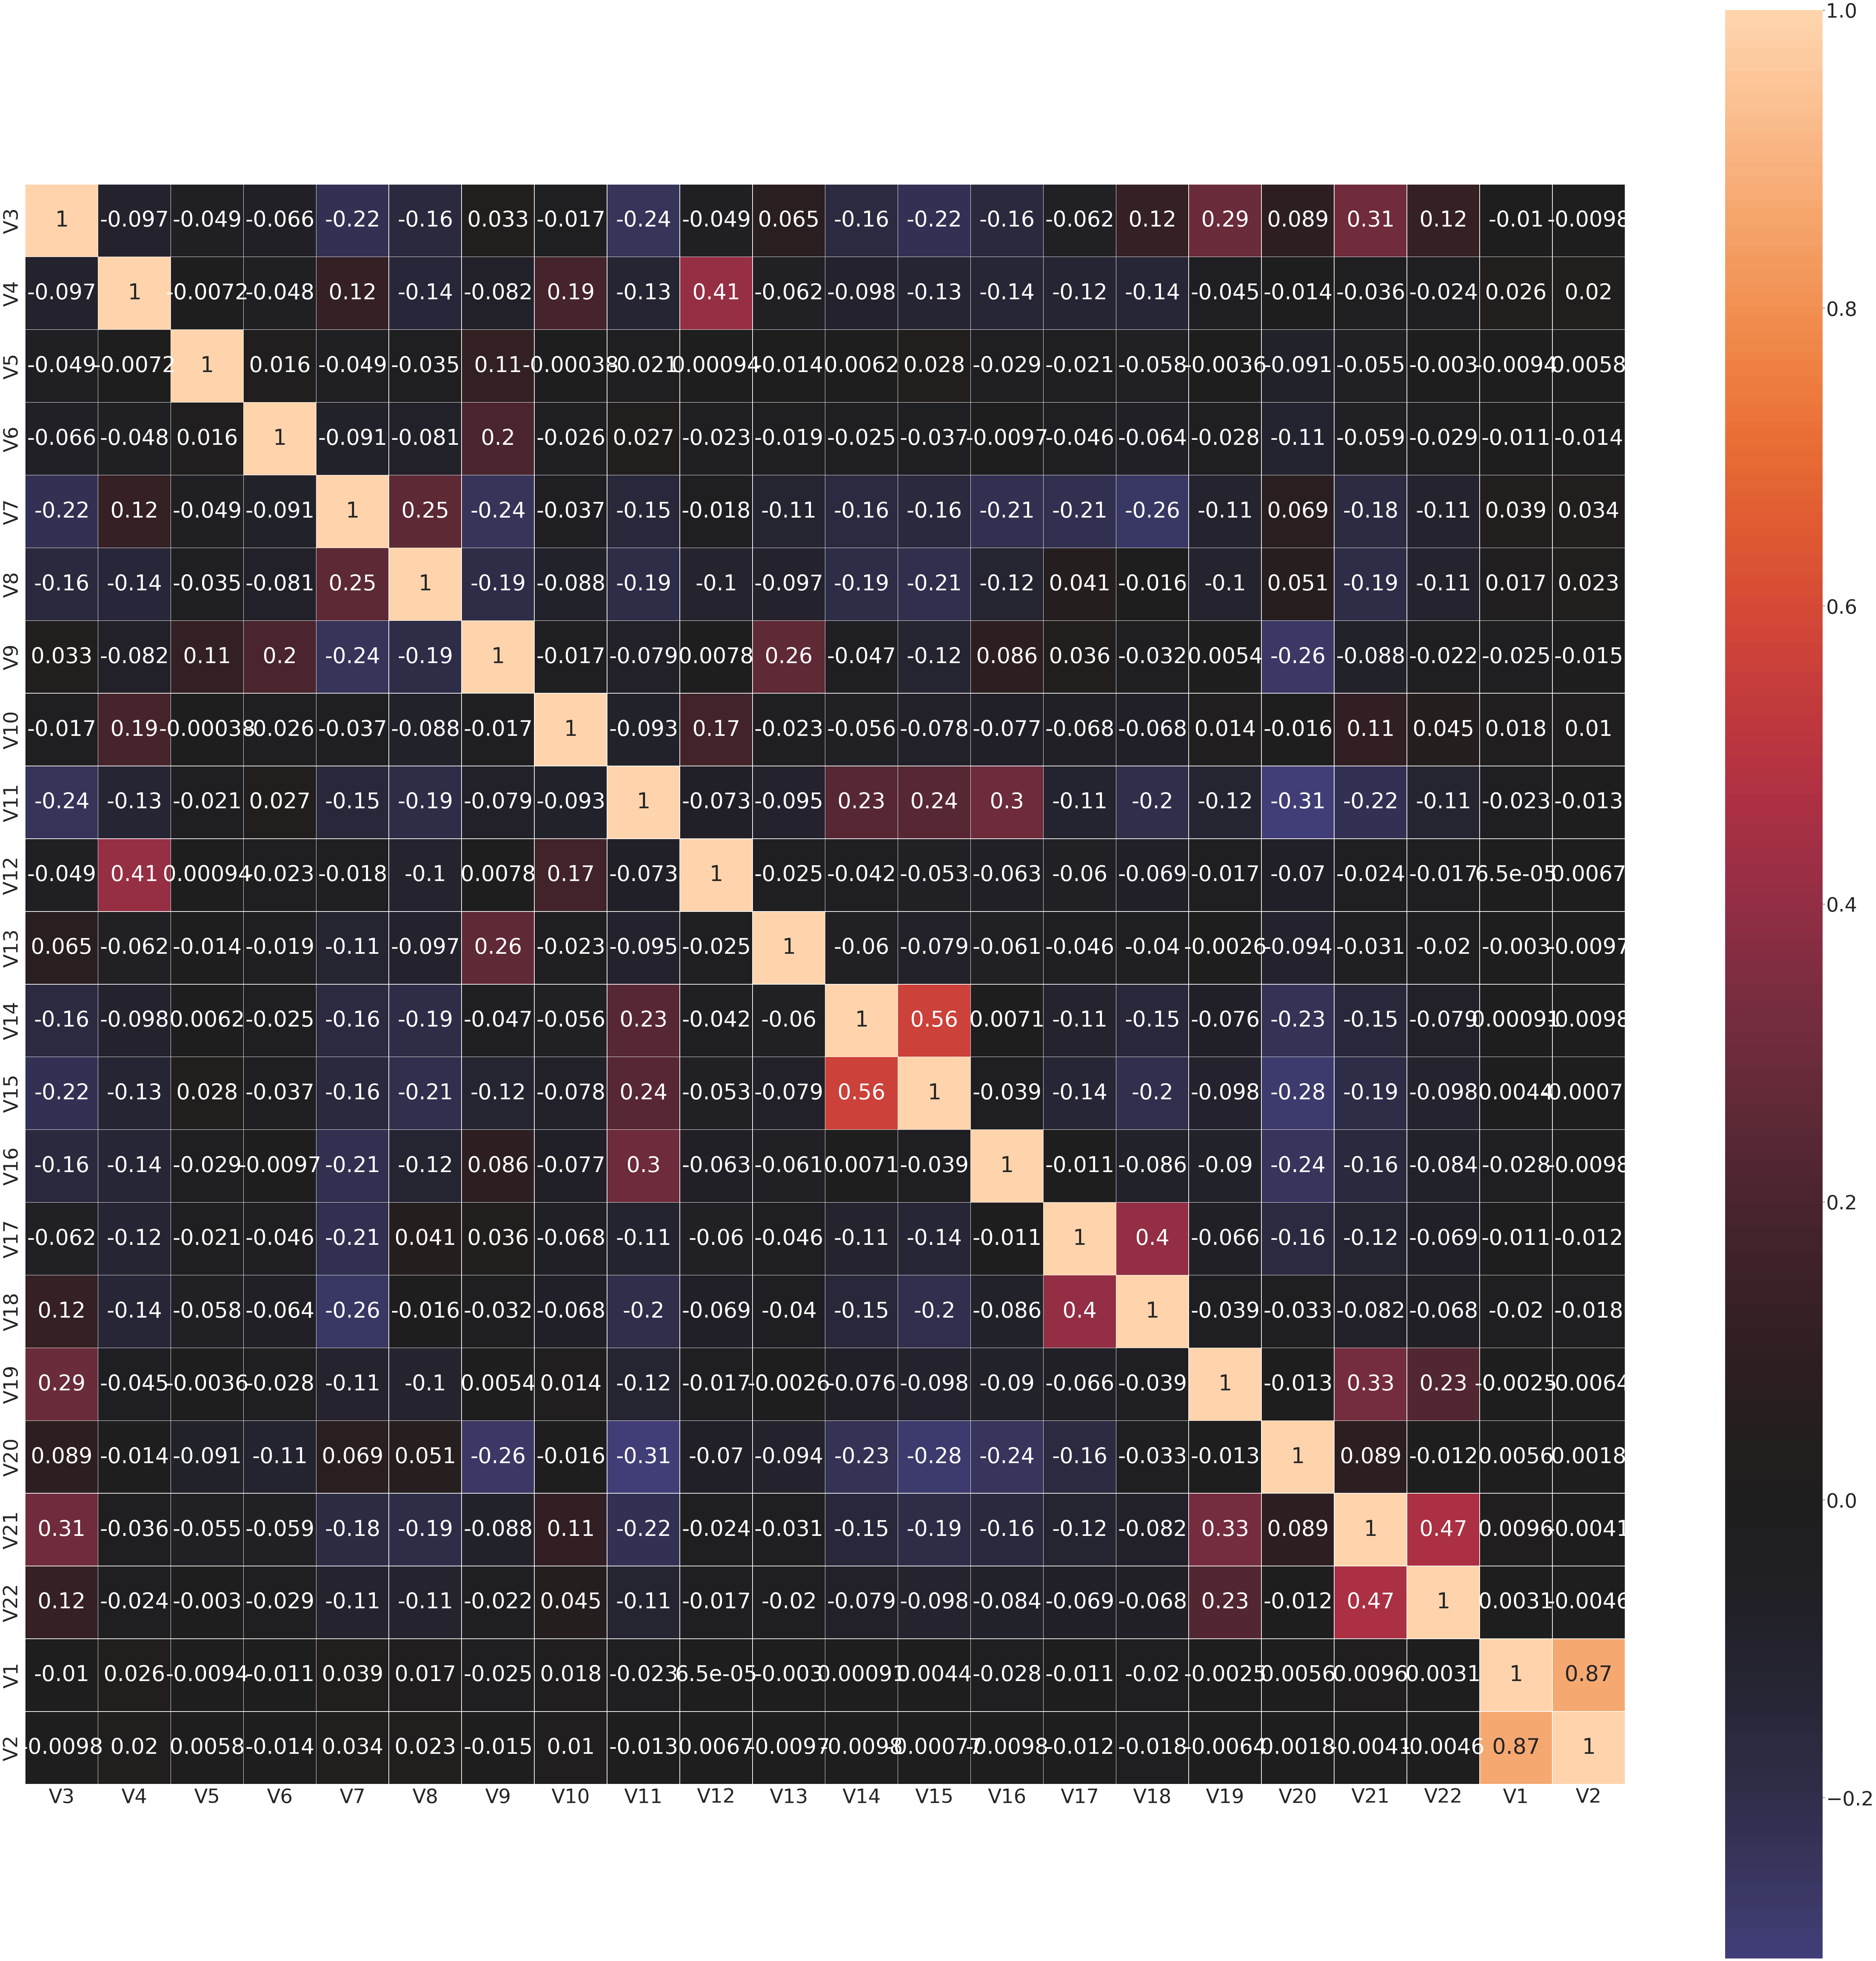

In [16]:
# Подивимось на кореляції в V_
columns_v_ += ["V1","V2"]
plt.figure(figsize=(100, 100))
sns.set(font_scale=5)
print("Кореляція в V_")
sns.heatmap(train_data[columns_v_].corr(), annot = True, square=True, center=0, linewidths=.5);

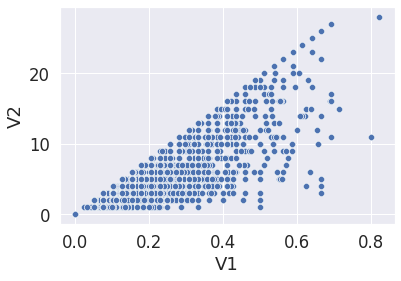

In [17]:
sns.set(font_scale=1.5)
sns.scatterplot(data = train_data, x ='V1', y = 'V2');

Бачимо, що силльно корелюють тільки V1 і  V2, тому має місце видалити один із них. Подивимось який

In [18]:
train_data[["V1", "V2"]].isna().sum()

V1    48
V2    48
dtype: int64

In [19]:
train_data[["V1", "V2"]].nunique()

V1    262
V2     29
dtype: int64

Отже бачимо, що в V1 більше унікальних значень, а тому будемо видаляти V2

Кореляція в P_


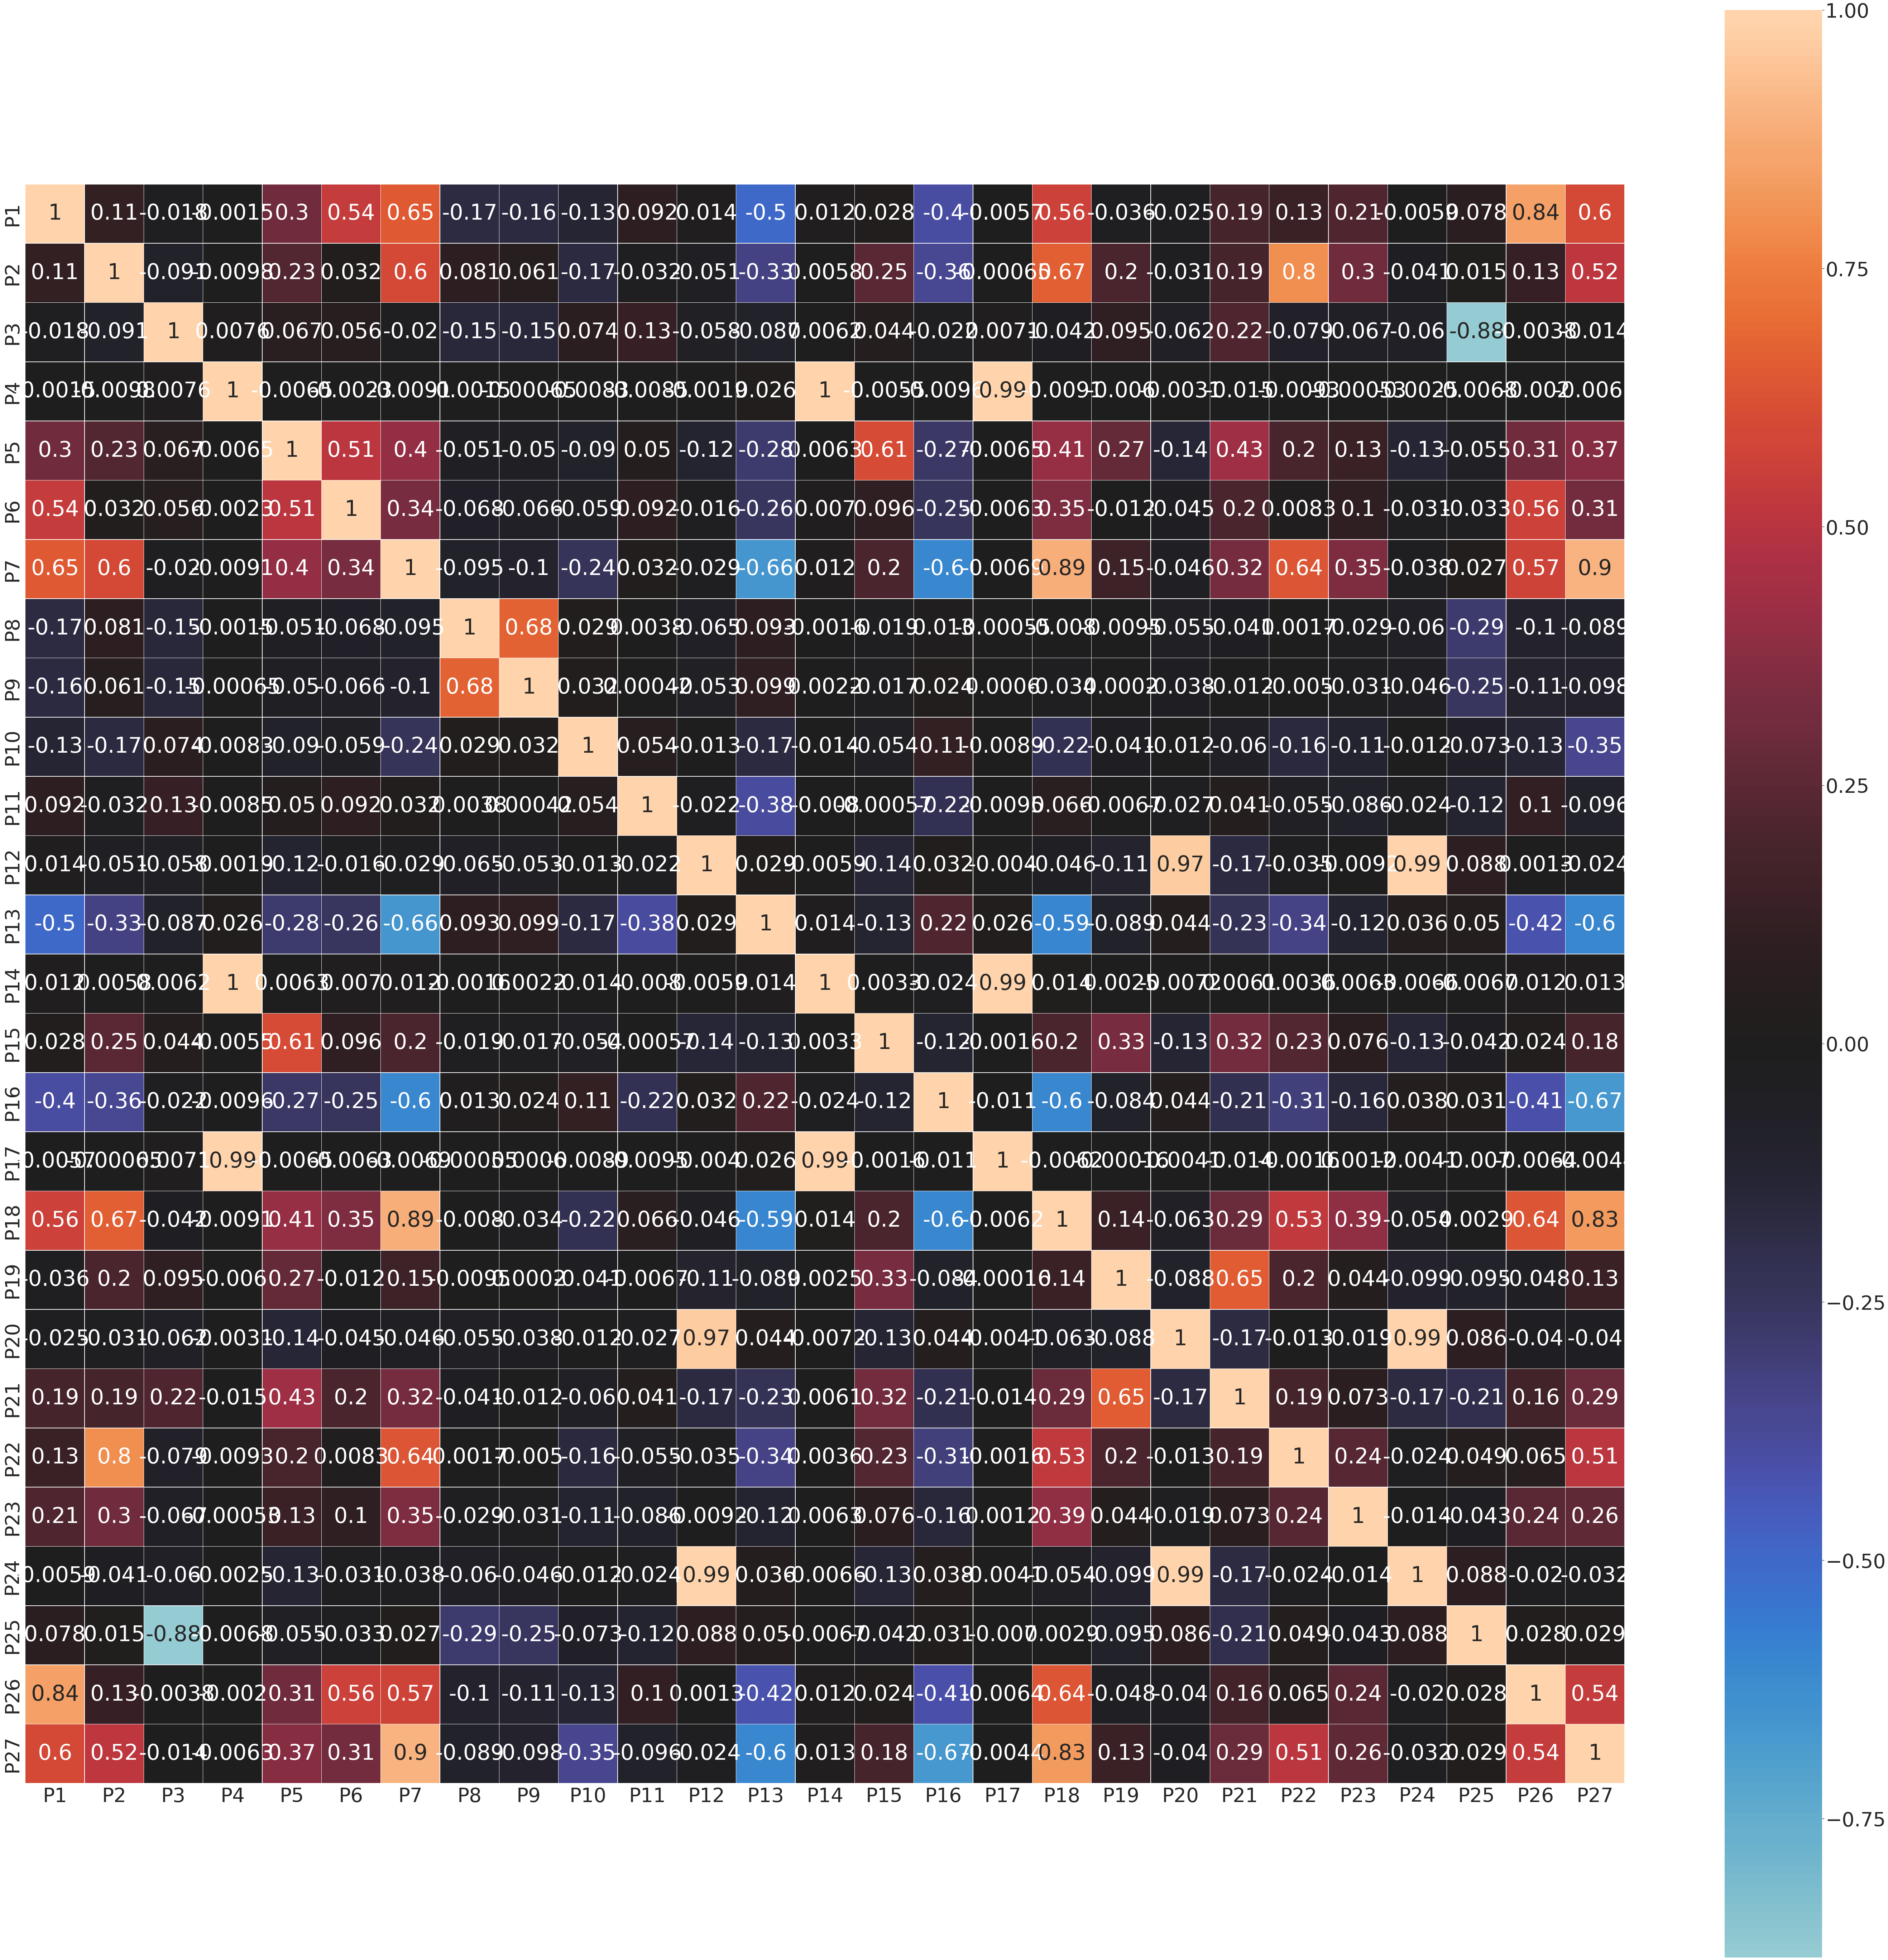

In [20]:
plt.figure(figsize=(100, 100))
sns.set(font_scale=5)
print("Кореляція в P_")
sns.heatmap(train_data[columns_p_].corr(), annot = True, square=True, center=0, linewidths=.5);

Бачимо, що сильно корелюють наступні пари


P1, P26 -аналогічно (0.84)

P3, P26 -сильна від'ємна кореляція (-0.88)

P4, P17 - надзвичайно велика кореляція між величинами (0.99)

p14, p17 - надзвичайно велика кореляція між величинами (0.99)

P4, P14 - лінійний зв'язок - пряма пропорційність ( corr = 1)

P7, P27 - додатній зв'язок (0.9)

P27, P18 - corr = 0.83

P7, P18 - 0.89

In [21]:
train_data[["P4", "P17", "P14"]].nunique()

P4     27945
P17    22948
P14    26743
dtype: int64

In [22]:
train_data[["P7", "P18", "P27"]].nunique()

P7     22022
P18    27778
P27     2573
dtype: int64

Кореляція між P1 і P3 низька, але P26 корелює з ними обома, тому будемо видаляти саме його.

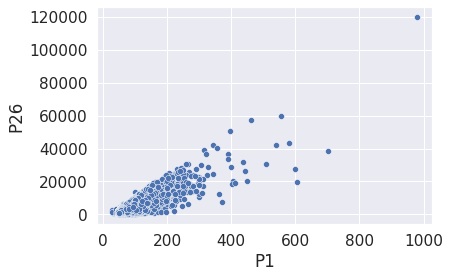

In [23]:
sns.set(font_scale=1.4)
sns.scatterplot(data = train_data, x ='P1', y = 'P26');

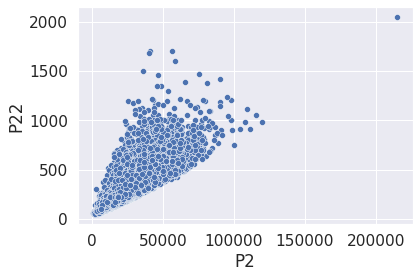

In [24]:

sns.scatterplot(data = train_data, x ='P2', y = 'P22');

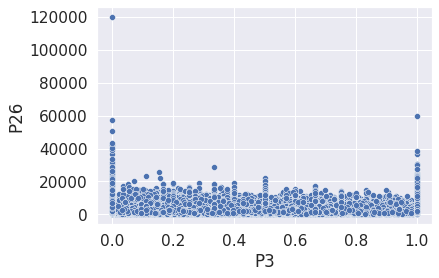

In [25]:

sns.scatterplot(data = train_data, x ='P3', y = 'P26');

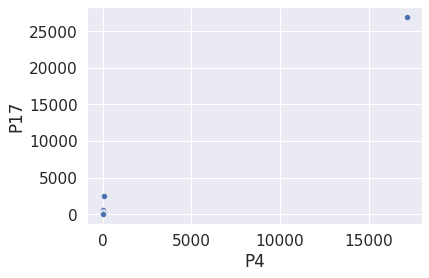

In [26]:

sns.scatterplot(data = train_data, x ='P4', y = 'P17');

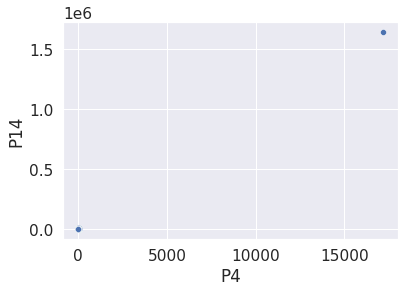

In [27]:
sns.scatterplot(data = train_data, x ='P4', y = 'P14');

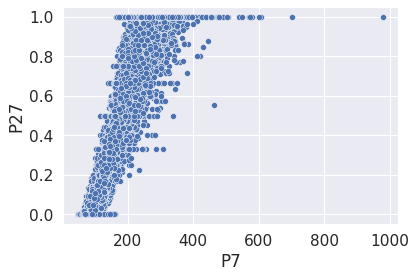

In [28]:

sns.scatterplot(data = train_data, x ='P7', y = 'P27');

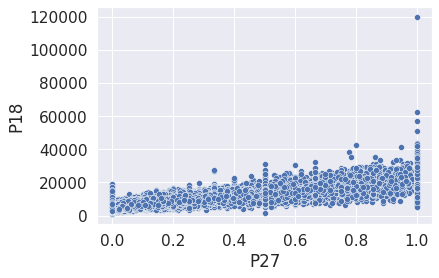

In [29]:

sns.scatterplot(data = train_data, x ='P27', y = 'P18');

Висновок по кореляції:  будемо видаляти наступні колонки: P17, P14, P7, P27, P26

In [30]:
plt.figure(figsize=(150, 150))
sns.set(font_scale=6)

sns.heatmap(train_data[columns_p_+columns_v_].corr().iloc[0:len(columns_p_),len(columns_p_) : -1], annot = True, square=True, center=0, linewidths=.5);

Бачимо, що між P і V особливо немає залежностей

In [31]:
#перевіримо кореляцію з Target
for col in (train_data.columns):
    print("For ", col, " :", np.corrcoef(train_data[col].fillna(0), train_data['target'])[0,1])

For  Id  : 0.012710827046887127
For  Week  : 2.3810786074743674e-19
For  V1  : 0.09954105531850364
For  V2  : 0.05884256294963657
For  V3  : -0.12865560098852805
For  V4  : -0.10498324901680343
For  V5  : -0.028552589304908265
For  V6  : -0.01526656450834608
For  V7  : -0.188389272898424
For  V8  : -0.18218706267677115
For  V9  : -0.10689944798276273
For  V10  : -0.02572359289889651
For  V11  : -0.1368397340261148
For  V12  : -0.02733047332569004
For  V13  : -0.03631743531939128
For  V14  : -0.08335191914497996
For  V15  : -0.12203189636773187
For  V16  : -0.10040596297451093
For  V17  : -0.10515895513721774
For  V18  : -0.13681069464450032
For  V19  : -0.0714021736548471
For  V20  : -0.20767001400821927
For  V21  : -0.11499391289493838
For  V22  : -0.0506467580427816
For  P1  : 0.05163205248694672
For  P2  : -0.2876041030728656
For  P3  : -0.076826592015546
For  P4  : 0.009536987688835053
For  P5  : -0.05044317654384631
For  P6  : 0.09592742233537777
For  P7  : -0.15243688521205362
Fo

Отже, бачимо, що кореляції параметрів і таргету низька.

In [32]:
# Те що для кожного юзера є усі 4 тижні ми знаємо, а чи однакові на них таргети? 
a = train_data[["Id","target"]].groupby("Id").agg(["min","max"]).reset_index()
a.columns = ["id","min","max"]
a[a["min"]!=a["max"]].shape[0]

0

Як бачимо, немає юзерів у кого різні таргети на різних тижнях.

## Передобробка

In [33]:
#Видаляємо непотрібні колонки
train_data = train_data.drop(["P17", "P14", "P7","P27", "P26"], axis=1)
# test_data = test_data.drop(["P17", "P14", "P7","P27", "P26"], axis=1)
train_data

Id  Week        V1   V2        V3        V4        V5  \
0     -6536978109522202983     0  0.000000  0.0  0.000000  0.011364  0.006579   
1     -6536978109522202983     1  0.000000  0.0  0.000000  0.011364  0.006579   
2     -6536978109522202983     2  0.000000  0.0  0.000000  0.011364  0.006579   
3     -6536978109522202983     3  0.000000  0.0  0.000000  0.011364  0.006579   
4     -1744017237843019509     0  0.051282  1.0  0.014363  0.018308  0.037632   
...                    ...   ...       ...  ...       ...       ...       ...   
30855  2010738301694279951     3  0.111111  2.0  0.006173  0.267642  0.000000   
30856  8802977523104348852     0  0.032258  1.0       NaN       NaN       NaN   
30857  8802977523104348852     1  0.032258  1.0       NaN       NaN       NaN   
30858  8802977523104348852     2  0.032258  1.0       NaN       NaN       NaN   
30859  8802977523104348852     3  0.032258  1.0       NaN       NaN       NaN   

           V6        V7        V8  ...       P16           P18        P19  \
0      0.0311  0.013158  0.006579  ...  0.500000  11038.166667  15.400000   
1      0.0311  0.013158  0.006579  ...  0.217391  14078.000000  17.016667   
2      0.0311  0.013158  0.006579  ...  0.227273  10814.454545  41.100000   
3      0.0311  0.013158  0.006579  ...  0.263158  13842.052632  33.850000   
4      0.0000  0.180246  0.103449  ...  0.108696  10859.086957  31.866667   
...       ...       ...       ...  ...       ...           ...        ...   
30855  0.0000  0.192127  0.000000  ...  0.135802  10236.172840  24.100000   
30856     NaN       NaN       NaN  ...  0.352941   9226.941176  19.566667   
30857     NaN       NaN       NaN  ...  0.000000  16426.000000   9.616667   
30858     NaN       NaN       NaN  ...  0.250000  13744.000000  26.683333   
30859     NaN       NaN       NaN  ...       NaN           NaN        NaN   

        P20        P21    P22       P23       P24       P25  target  
0      4.82   8.911111  200.0  0.000000  4.820000  0.333333     0.0  
1      4.82   8.292754  510.0  0.000000  4.820000  0.652174     0.0  
2      4.82   9.753030  190.0  0.000000  4.820000  0.500000     0.0  
3      4.82  10.520614  382.0  0.026316  4.814737  0.447368     0.0  
4      4.94   9.438406  777.0  0.021739  4.908478  0.673913     0.0  
...     ...        ...    ...       ...       ...       ...     ...  
30855  4.97   8.271399  406.0  0.000000  4.966790  0.555556     0.0  
30856  4.98  11.681373  234.0  0.000000  4.980000  0.058824     1.0  
30857  4.99   9.616667  171.0  0.000000  4.990000  0.000000     1.0  
30858  4.99  17.962500  220.0  0.000000  4.990000  0.250000     1.0  
30859   NaN        NaN    NaN       NaN       NaN       NaN     1.0  

[30860 rows x 47 columns]

In [34]:
from sklearn.preprocessing import StandardScaler
v_p_columns = train_data.drop(columns=["Id","Week","target"]).columns
scaler = StandardScaler()
train_data[v_p_columns] = scaler.fit_transform(train_data[v_p_columns])

In [35]:
train_data["is_na_in_V"] = train_data["V3"].isna().astype(int)
train_data["is_na_in_P"] = train_data["P1"].isna().astype(int)

In [36]:
agg_train_data = train_data.drop(columns=["Week", "target", "is_na_in_V", "is_na_in_P"]).groupby(by="Id", as_index = False  ).agg(['min', 'max', 'mean', 'sum'])
agg_train_data.columns = ['_'.join(col) for col in agg_train_data.columns.values]
agg_train_data = agg_train_data.reset_index()
agg_train_data

Id    V1_min    V1_max   V1_mean     V1_sum    V2_min  \
0    -9217315602200933985  2.373776  2.373776  2.373776   9.495105  1.715817   
1    -9213274821386443078 -0.517143 -0.517143 -0.517143  -2.068571 -0.309612   
2    -9208710115890940128  4.088390  4.088390  4.088390  16.353561  6.779389   
3    -9205482426769313939 -0.736454 -0.736454 -0.736454  -2.945815 -0.647184   
4    -9204742353296425998 -0.078520 -0.078520 -0.078520  -0.314082 -0.309612   
...                   ...       ...       ...       ...        ...       ...   
7710  9215456666947967643 -0.736454 -0.736454 -0.736454  -2.945815 -0.647184   
7711  9217675734888214114 -0.297832 -0.297832 -0.297832  -1.191326  0.027959   
7712  9220558206402716117 -0.297832 -0.297832 -0.297832  -1.191326  0.027959   
7713  9222188311406951236 -0.736454 -0.736454 -0.736454  -2.945815 -0.647184   
7714  9222566437483689898 -0.297832 -0.297832 -0.297832  -1.191326 -0.309612   

        V2_max   V2_mean     V2_sum    V3_min  ...  P23_mean   P23_sum  \
0     1.715817  1.715817   6.863267  0.333344  ... -0.218339 -0.873357   
1    -0.309612 -0.309612  -1.238449 -0.420541  ... -0.218339 -0.873357   
2     6.779389  6.779389  27.117555 -0.404398  ...  1.310171  5.240683   
3    -0.647184 -0.647184  -2.588734  0.333638  ... -0.024434 -0.097735   
4    -0.309612 -0.309612  -1.238449 -0.616923  ... -0.218339 -0.873357   
...        ...       ...        ...       ...  ...       ...       ...   
7710 -0.647184 -0.647184  -2.588734 -0.544347  ...  0.322376  1.289505   
7711  0.027959  0.027959   0.111837 -0.181640  ... -0.083449 -0.333794   
7712  0.027959  0.027959   0.111837       NaN  ... -0.218339 -0.655018   
7713 -0.647184 -0.647184  -2.588734 -0.616923  ... -0.218339 -0.873357   
7714 -0.309612 -0.309612  -1.238449 -0.137643  ...  0.054440  0.217759   

       P24_min   P24_max  P24_mean    P24_sum   P25_min   P25_max  P25_mean  \
0    -0.449710  0.029175 -0.185433  -0.741731 -1.492945 -1.492945 -1.492945   
1    -0.636233  0.035251 -0.468362  -1.873449  0.402213  1.360939  1.039506   
2    -0.636233 -0.002053 -0.342170  -1.368680 -0.053910  0.499678  0.237027   
3    -1.746048 -1.062040 -1.489581  -5.958323  0.146110  0.672949  0.406548   
4     0.179693  0.473582  0.384122   1.536488 -0.901286 -0.066003 -0.430160   
...        ...       ...       ...        ...       ...       ...       ...   
7710  0.156492  0.208261  0.169434   0.677737 -0.252478  0.616448  0.293628   
7711 -3.410771 -2.776591 -3.050506 -12.202023 -0.701923 -0.193408 -0.460418   
7712 -0.002053  0.104722  0.033538   0.100615 -0.518292 -0.000144 -0.278537   
7713  0.473582  0.473582  0.473582   1.894327 -1.492945 -1.492945 -1.492945   
7714  0.473582  0.632127  0.515105   2.060422  1.404540  1.539307  1.489136   

       P25_sum  
0    -5.971780  
1     4.158023  
2     0.948108  
3     1.626192  
4    -1.720641  
...        ...  
7710  1.174511  
7711 -1.841670  
7712 -0.835610  
7713 -5.971780  
7714  5.956543  

[7715 rows x 177 columns]

In [37]:
# def weighted_target(target_list):
#     return 0.05*target_list[0] + 0.15*target_list[1] + 0.3*target_list[2] + 0.5*target_list[3] 
train_data["target"] = train_data["target"].astype(int)
agg_target = train_data.sort_values(by=["Id","Week"]).groupby(by="Id", sort=False).agg({"target": "mean"})
agg_target = agg_target.reset_index()

In [38]:
agg_train_data = agg_train_data.merge(agg_target, on ="Id")

In [39]:
agg_train_data[v_p_columns + '_min'] = agg_train_data[v_p_columns + '_min'].fillna(-0.5)
agg_train_data[v_p_columns + '_max'] = agg_train_data[v_p_columns + '_max'].fillna(0.5)
agg_train_data[v_p_columns + '_mean'] = agg_train_data[v_p_columns + '_mean'].fillna(0)

In [40]:
agg_train_data

Id    V1_min    V1_max   V1_mean     V1_sum    V2_min  \
0    -9217315602200933985  2.373776  2.373776  2.373776   9.495105  1.715817   
1    -9213274821386443078 -0.517143 -0.517143 -0.517143  -2.068571 -0.309612   
2    -9208710115890940128  4.088390  4.088390  4.088390  16.353561  6.779389   
3    -9205482426769313939 -0.736454 -0.736454 -0.736454  -2.945815 -0.647184   
4    -9204742353296425998 -0.078520 -0.078520 -0.078520  -0.314082 -0.309612   
...                   ...       ...       ...       ...        ...       ...   
7710  9215456666947967643 -0.736454 -0.736454 -0.736454  -2.945815 -0.647184   
7711  9217675734888214114 -0.297832 -0.297832 -0.297832  -1.191326  0.027959   
7712  9220558206402716117 -0.297832 -0.297832 -0.297832  -1.191326  0.027959   
7713  9222188311406951236 -0.736454 -0.736454 -0.736454  -2.945815 -0.647184   
7714  9222566437483689898 -0.297832 -0.297832 -0.297832  -1.191326 -0.309612   

        V2_max   V2_mean     V2_sum    V3_min  ...   P23_sum   P24_min  \
0     1.715817  1.715817   6.863267  0.333344  ... -0.873357 -0.449710   
1    -0.309612 -0.309612  -1.238449 -0.420541  ... -0.873357 -0.636233   
2     6.779389  6.779389  27.117555 -0.404398  ...  5.240683 -0.636233   
3    -0.647184 -0.647184  -2.588734  0.333638  ... -0.097735 -1.746048   
4    -0.309612 -0.309612  -1.238449 -0.616923  ... -0.873357  0.179693   
...        ...       ...        ...       ...  ...       ...       ...   
7710 -0.647184 -0.647184  -2.588734 -0.544347  ...  1.289505  0.156492   
7711  0.027959  0.027959   0.111837 -0.181640  ... -0.333794 -3.410771   
7712  0.027959  0.027959   0.111837 -0.500000  ... -0.655018 -0.002053   
7713 -0.647184 -0.647184  -2.588734 -0.616923  ... -0.873357  0.473582   
7714 -0.309612 -0.309612  -1.238449 -0.137643  ...  0.217759  0.473582   

       P24_max  P24_mean    P24_sum   P25_min   P25_max  P25_mean   P25_sum  \
0     0.029175 -0.185433  -0.741731 -1.492945 -1.492945 -1.492945 -5.971780   
1     0.035251 -0.468362  -1.873449  0.402213  1.360939  1.039506  4.158023   
2    -0.002053 -0.342170  -1.368680 -0.053910  0.499678  0.237027  0.948108   
3    -1.062040 -1.489581  -5.958323  0.146110  0.672949  0.406548  1.626192   
4     0.473582  0.384122   1.536488 -0.901286 -0.066003 -0.430160 -1.720641   
...        ...       ...        ...       ...       ...       ...       ...   
7710  0.208261  0.169434   0.677737 -0.252478  0.616448  0.293628  1.174511   
7711 -2.776591 -3.050506 -12.202023 -0.701923 -0.193408 -0.460418 -1.841670   
7712  0.104722  0.033538   0.100615 -0.518292 -0.000144 -0.278537 -0.835610   
7713  0.473582  0.473582   1.894327 -1.492945 -1.492945 -1.492945 -5.971780   
7714  0.632127  0.515105   2.060422  1.404540  1.539307  1.489136  5.956543   

      target  
0          0  
1          1  
2          0  
3          0  
4          0  
...      ...  
7710       0  
7711       0  
7712       0  
7713       0  
7714       0  

[7715 rows x 178 columns]

In [41]:
all_v_p_columns = agg_train_data.drop(columns=["Id","target"]).columns
agg_train_data[all_v_p_columns] *= 100
agg_train_data[all_v_p_columns] = agg_train_data[all_v_p_columns].astype(int)

In [42]:
agg_train_data

Id  V1_min  V1_max  V1_mean  V1_sum  V2_min  V2_max  \
0    -9217315602200933985     237     237      237     949     171     171   
1    -9213274821386443078     -51     -51      -51    -206     -30     -30   
2    -9208710115890940128     408     408      408    1635     677     677   
3    -9205482426769313939     -73     -73      -73    -294     -64     -64   
4    -9204742353296425998      -7      -7       -7     -31     -30     -30   
...                   ...     ...     ...      ...     ...     ...     ...   
7710  9215456666947967643     -73     -73      -73    -294     -64     -64   
7711  9217675734888214114     -29     -29      -29    -119       2       2   
7712  9220558206402716117     -29     -29      -29    -119       2       2   
7713  9222188311406951236     -73     -73      -73    -294     -64     -64   
7714  9222566437483689898     -29     -29      -29    -119     -30     -30   

      V2_mean  V2_sum  V3_min  ...  P23_sum  P24_min  P24_max  P24_mean  \
0         171     686      33  ...      -87      -44        2       -18   
1         -30    -123     -42  ...      -87      -63        3       -46   
2         677    2711     -40  ...      524      -63        0       -34   
3         -64    -258      33  ...       -9     -174     -106      -148   
4         -30    -123     -61  ...      -87       17       47        38   
...       ...     ...     ...  ...      ...      ...      ...       ...   
7710      -64    -258     -54  ...      128       15       20        16   
7711        2      11     -18  ...      -33     -341     -277      -305   
7712        2      11     -50  ...      -65        0       10         3   
7713      -64    -258     -61  ...      -87       47       47        47   
7714      -30    -123     -13  ...       21       47       63        51   

      P24_sum  P25_min  P25_max  P25_mean  P25_sum  target  
0         -74     -149     -149      -149     -597       0  
1        -187       40      136       103      415       1  
2        -136       -5       49        23       94       0  
3        -595       14       67        40      162       0  
4         153      -90       -6       -43     -172       0  
...       ...      ...      ...       ...      ...     ...  
7710       67      -25       61        29      117       0  
7711    -1220      -70      -19       -46     -184       0  
7712       10      -51        0       -27      -83       0  
7713      189     -149     -149      -149     -597       0  
7714      206      140      153       148      595       0  

[7715 rows x 178 columns]

## Моделі

In [43]:
from catboost import CatBoostClassifier, Pool

In [44]:
# подивимось на кількість унікальних значень
# Подивимось на відношення кількості унікальних до в принципі кількості об'єктів, відношення до не відсутніх об'єктів, і знайдемо гармонічеу функцію для них. 
# Чим більше значення з останньої колонки, тим більше дані є неперервні.
df_unique_values = pd.DataFrame(agg_train_data.nunique(), columns=["n_unique"])
df_unique_values["nunique / n_obj"] = agg_train_data.nunique()/(train_data.shape[0]) * 100

In [45]:
X = agg_train_data.drop('target', 1)
Y = agg_train_data["target"]

columns = X.columns.tolist()
cat_features =  set(df_unique_values[df_unique_values["nunique / n_obj"] < 1].index) - {'target'}
cat_features  = [columns.index(i) for i in cat_features ]


X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, train_size=0.2, random_state=42, stratify = Y)

train_pool = Pool(
    data = X_train,
    label = Y_train,
    cat_features = cat_features
)

validation_pool = Pool(
    data = X_validation,
    label = Y_validation,
    cat_features = cat_features
)


params = { 'iterations' : 5000, 'depth' : 8, 
                   'learning_rate' : 0.13851548141121092/8, 
                   'colsample_bylevel' : 0.42513600460183565/8, 
                   'bagging_temperature' : 3.7987780158429185/8, 
                   'early_stopping_rounds': 500/2, 'random_seed' : 42, 
                   'loss_function' : 'Logloss','eval_metric' : 'AUC', 
                   'boosting_type' : 'Plain','bootstrap_type' : 'MVS', 
                   'task_type' : 'CPU', 'cat_features' : cat_features}

model_catboost = CatBoostClassifier(
    **params
)

# grid = {'learning_rate': [0.03, 0.1],
#         'depth': [4, 6, 10],
#         'l2_leaf_reg': [1, 3, 5, 7, 9]}

# grid_search_result = model.grid_search(grid, 
#                                        X=X_train, 
#                                        y=Y_train, 
#                                        plot=True)

model_catboost.fit(train_pool, 
          eval_set =  validation_pool,
          verbose = 100, 
          plot = True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.8209708	best: 0.8209708 (0)	total: 60.1ms	remaining: 5m
100:	test: 0.9478591	best: 0.9478591 (100)	total: 895ms	remaining: 43.4s
200:	test: 0.9564536	best: 0.9564536 (200)	total: 1.81s	remaining: 43.3s
300:	test: 0.9592349	best: 0.9592349 (300)	total: 2.76s	remaining: 43.1s
400:	test: 0.9599350	best: 0.9599817 (390)	total: 3.7s	remaining: 42.4s
500:	test: 0.9602902	best: 0.9602902 (500)	total: 4.64s	remaining: 41.6s
600:	test: 0.9608151	best: 0.9608151 (600)	total: 5.55s	remaining: 40.6s
700:	test: 0.9611364	best: 0.9611547 (698)	total: 6.47s	remaining: 39.7s
800:	test: 0.9613492	best: 0.9613542 (798)	total: 7.4s	remaining: 38.8s
900:	test: 0.9614363	best: 0.9614363 (900)	total: 8.36s	remaining: 38s
1000:	test: 0.9615203	best: 0.9615602 (991)	total: 9.29s	remaining: 37.1s
1100:	test: 0.9616213	best: 0.9616336 (1069)	total: 10.2s	remaining: 36.2s
1200:	test: 0.9617007	best: 0.9617227 (1186)	total: 11.1s	remaining: 35.1s
1300:	test: 0.9617494	best: 0.9617494 (1300)	total: 12.1

In [47]:
import sklearn

In [48]:
auc = sklearn.metrics.roc_auc_score(Y_validation, model_catboost.predict_proba(X_validation)[:, 1])
auc

0.9621492300700976

In [50]:
test_data = test_data.drop(["P17", "P14", "P7","P27", "P26"], axis=1)
v_p_columns = test_data.drop(columns=["Id","Week"]).columns
scaler = StandardScaler()
test_data[v_p_columns] = scaler.fit_transform(test_data[v_p_columns])
test_data["is_na_in_V"] = test_data["V3"].isna().astype(int)
test_data["is_na_in_P"] = test_data["P1"].isna().astype(int)
agg_test_data = test_data.drop(columns=["Week",  "is_na_in_V", "is_na_in_P"]).groupby(by="Id", as_index = False  ).agg(['min', 'max', 'mean', 'sum'])
agg_test_data.columns = ['_'.join(col) for col in agg_test_data.columns.values]
agg_test_data = agg_test_data.reset_index()
agg_test_data[v_p_columns + '_min'] = agg_test_data[v_p_columns + '_min'].fillna(-0.5)
agg_test_data[v_p_columns + '_max'] = agg_test_data[v_p_columns + '_max'].fillna(0.5)
agg_test_data[v_p_columns + '_mean'] = agg_test_data[v_p_columns + '_mean'].fillna(0)
all_v_p_columns = agg_test_data.drop(columns=["Id"]).columns
agg_test_data[all_v_p_columns] *= 100
agg_test_data[all_v_p_columns] = agg_test_data[all_v_p_columns].astype(int)

In [72]:
agg_test_data["Predicted"] = model_catboost.predict_proba(agg_test_data)[:, 1]
result1 = agg_test_data[["Id","Predicted"]]
result1.to_csv("Submission_catboost.csv")
result1

Id  Predicted
0    -9193687728771344321   0.003105
1    -9190465597412250947   0.000443
2    -9188720494569941813   0.002342
3    -9181694933618130417   0.000341
4    -9181374021833011628   0.000838
...                   ...        ...
3302  9203822720702563491   0.163464
3303  9205406046009482646   0.000518
3304  9206342053685832016   0.007427
3305  9213027496842209017   0.002988
3306  9221450110538849279   0.038908

[3307 rows x 2 columns]

In [58]:
import optuna
import lightgbm as lgb
from  sklearn.metrics import roc_auc_score

def objective(trial):
    
    dtrain = lgb.Dataset(X_train, label= Y_train)

    param = {
        "objective": "binary",
        "metric": "auc",
        "verbosity": -1,
        "boosting_type": "gbdt",
        "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
        "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 2, 256),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
    }

    gbm = lgb.train(param, dtrain)
    preds = gbm.predict(X_validation)
    pred_labels = np.rint(preds)
    auc = sklearn.metrics.roc_auc_score(Y_validation, pred_labels)
    return auc


In [59]:
if __name__ == "__main__":
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=100)

    print("Number of finished trials: {}".format(len(study.trials)))

    print("Best trial:")
    trial = study.best_trial

    print("  Value: {}".format(trial.value))

    print("  Params: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))

[I 2022-01-24 13:18:02,977] A new study created in memory with name: no-name-4f9485af-6dd4-4181-8f9b-7e233640a405
[I 2022-01-24 13:18:06,791] Trial 0 finished with value: 0.8146804453148216 and parameters: {'lambda_l1': 2.510098479510578e-06, 'lambda_l2': 0.0007244082105891893, 'num_leaves': 66, 'feature_fraction': 0.7811305911894058, 'bagging_fraction': 0.8975938298069943, 'bagging_freq': 2, 'min_child_samples': 18}. Best is trial 0 with value: 0.8146804453148216.
[I 2022-01-24 13:18:09,388] Trial 1 finished with value: 0.8157360616391209 and parameters: {'lambda_l1': 0.007744891723242304, 'lambda_l2': 9.775255942173313e-05, 'num_leaves': 70, 'feature_fraction': 0.4522266668299965, 'bagging_fraction': 0.4799373411683645, 'bagging_freq': 1, 'min_child_samples': 19}. Best is trial 1 with value: 0.8157360616391209.
[I 2022-01-24 13:18:12,292] Trial 2 finished with value: 0.8140389363581686 and parameters: {'lambda_l1': 0.004439307350872451, 'lambda_l2': 0.0009357670303449991, 'num_leaves

Number of finished trials: 100
Best trial:
  Value: 0.8361385945316929
  Params: 
    lambda_l1: 2.9945996077026647e-06
    lambda_l2: 0.002590555057560883
    num_leaves: 51
    feature_fraction: 0.9591583440610953
    bagging_fraction: 0.49462877391008503
    bagging_freq: 2
    min_child_samples: 57


In [60]:
trial.params

{'lambda_l1': 2.9945996077026647e-06,
 'lambda_l2': 0.002590555057560883,
 'num_leaves': 51,
 'feature_fraction': 0.9591583440610953,
 'bagging_fraction': 0.49462877391008503,
 'bagging_freq': 2,
 'min_child_samples': 57}

In [65]:
from lightgbm import LGBMClassifier

model_lgb = LGBMClassifier(
    **trial.params
)

model_lgb.fit(X_validation, 
          Y_validation)
auc = sklearn.metrics.roc_auc_score(Y_validation, model_lgb.predict_proba(X_validation)[:, 1])
auc

0.9999585709317893

In [73]:
agg_test_data["Predicted"] = model_lgb.predict_proba(agg_test_data.drop(columns=["Predicted"]))[:, 1]
result2 = agg_test_data[["Id","Predicted"]]
result2.to_csv("Submission_lgbm.csv")
result2

Id  Predicted
0    -9193687728771344321   0.000118
1    -9190465597412250947   0.000691
2    -9188720494569941813   0.006208
3    -9181694933618130417   0.000139
4    -9181374021833011628   0.001180
...                   ...        ...
3302  9203822720702563491   0.026736
3303  9205406046009482646   0.000685
3304  9206342053685832016   0.006286
3305  9213027496842209017   0.000638
3306  9221450110538849279   0.442047

[3307 rows x 2 columns]

In [75]:
a  = result1.merge(result2, on = "Id")

In [77]:
a["diff"] = np.abs(a["Predicted_x"] - a["Predicted_y"])

In [79]:
a["diff"].mean()

0.07058403541363772